
- 자전거 대여량을 예측하는 문제 => 분류와 회귀 중 회귀와 관련된 문제

### Data Fields
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 노트북 안에 그래프 그리기
%matplotlib inline

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system') 
    
# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [9]:
train = pd.read_csv('./data/train.csv', parse_dates = ['datetime'])
# datetime 컬럼 type이 object => parse_dates로 type 변경가능
train.shape

(10886, 12)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [11]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

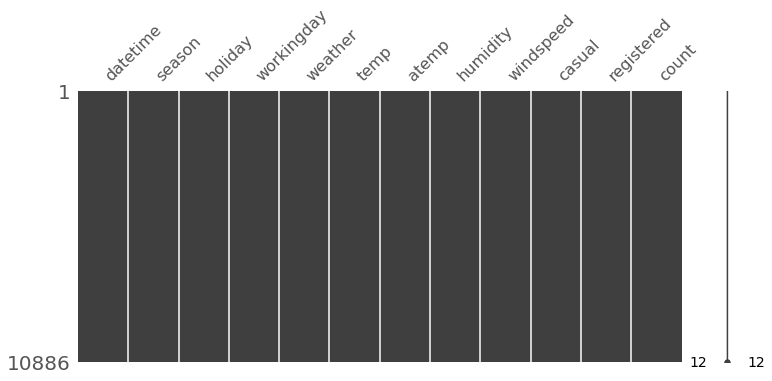

In [14]:
import missingno as msno

msno.matrix(train, figsize = (12,5))

In [15]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.shape

(10886, 18)

In [16]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


- 날짜/시간대별 대여량

[Text(0.5, 1.0, '시간별 대여량')]

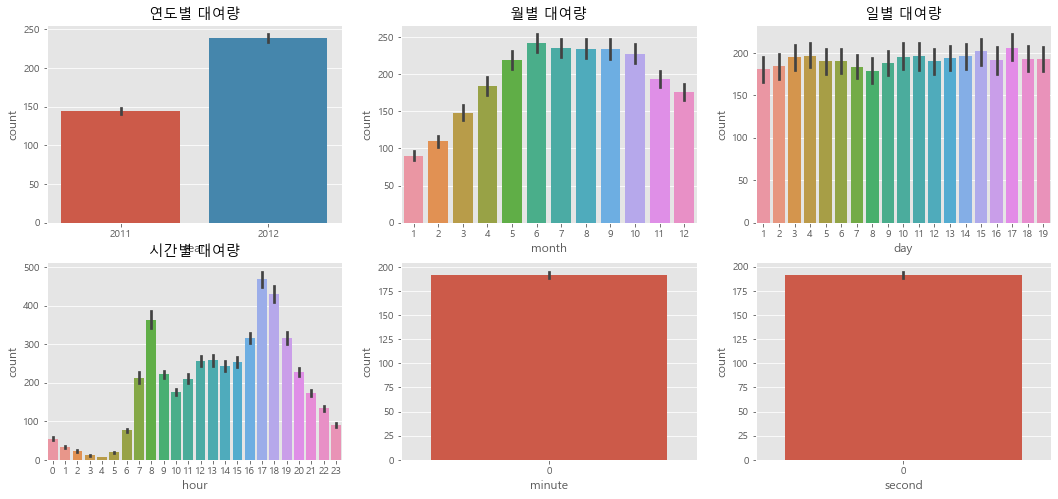

In [32]:
f, ax = plt.subplots(2, 3, figsize = (18,8))

sns.barplot(data=train, x="year", y="count", ax=ax[0,0])
sns.barplot(data=train, x="month", y="count", ax=ax[0,1])
sns.barplot(data=train, x="day", y="count", ax=ax[0,2])
sns.barplot(data=train, x="hour", y="count", ax=ax[1,0])
sns.barplot(data=train, x="minute", y="count", ax=ax[1,1])
sns.barplot(data=train, x="second", y="count", ax=ax[1,2])

ax[0,0].set(title = '연도별 대여량')
ax[0,1].set(title = '월별 대여량')
ax[0,2].set(title = '일별 대여량')
ax[1,0].set(title = '시간별 대여량')

- 연도별 대여량은 2011년 보다 2012년이 더 많다
- 월별 대여량은 6월에 가장 많고 7~10월도 대여량이 많다. 반면 1월은 대여량이 가장 적다
- 일별 대여량은 1일부터 19일까지만 있고, 나머지 데이터는 train.csv에 있으므로 day feature는 사용할 수 없다.
- 시간별 대여량을 보면 출퇴근 시간대(8시, 5~6시)에 대여량이 많은 것으로 추정, 주말과 나눠서 살펴 볼 필요가 있다.

[Text(0.5, 1.0, '근무여부에 따른 대여량')]

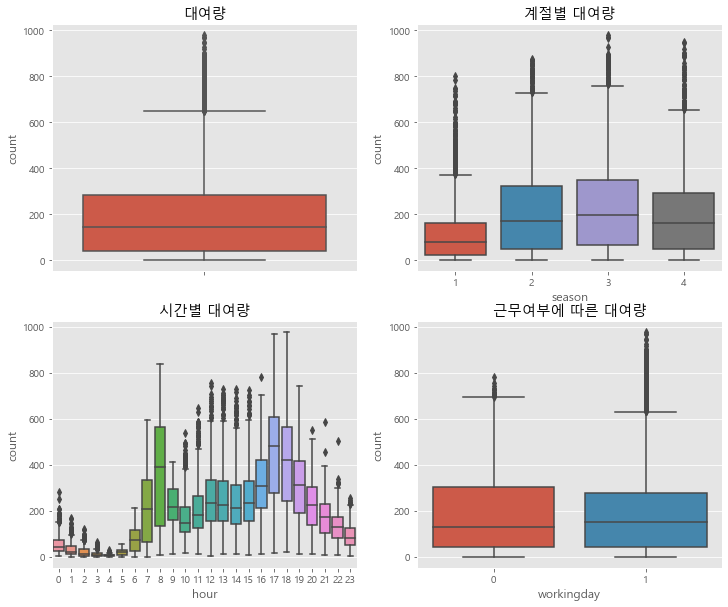

In [41]:
f,ax = plt.subplots(2,2, figsize = (12,10))

sns.boxplot(data = train, y = 'count', ax = ax[0,0])
sns.boxplot(data = train, x = 'season', y = 'count' ,ax = ax[0,1])
sns.boxplot(data = train, x = 'hour', y = 'count' ,ax = ax[1,0])
sns.boxplot(data = train, x = 'workingday', y = 'count' ,ax = ax[1,1])

ax[0,0].set(title = '대여량')
ax[0,1].set(title = '계절별 대여량')
ax[1,0].set(title = '시간별 대여량')
ax[1,1].set(title = '근무여부에 따른 대여량')

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [43]:
# series.dt.dayofweek => 요일을 숫자로 반환
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [48]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

[Text(0.5, 1.0, '계절별 - 시간대')]

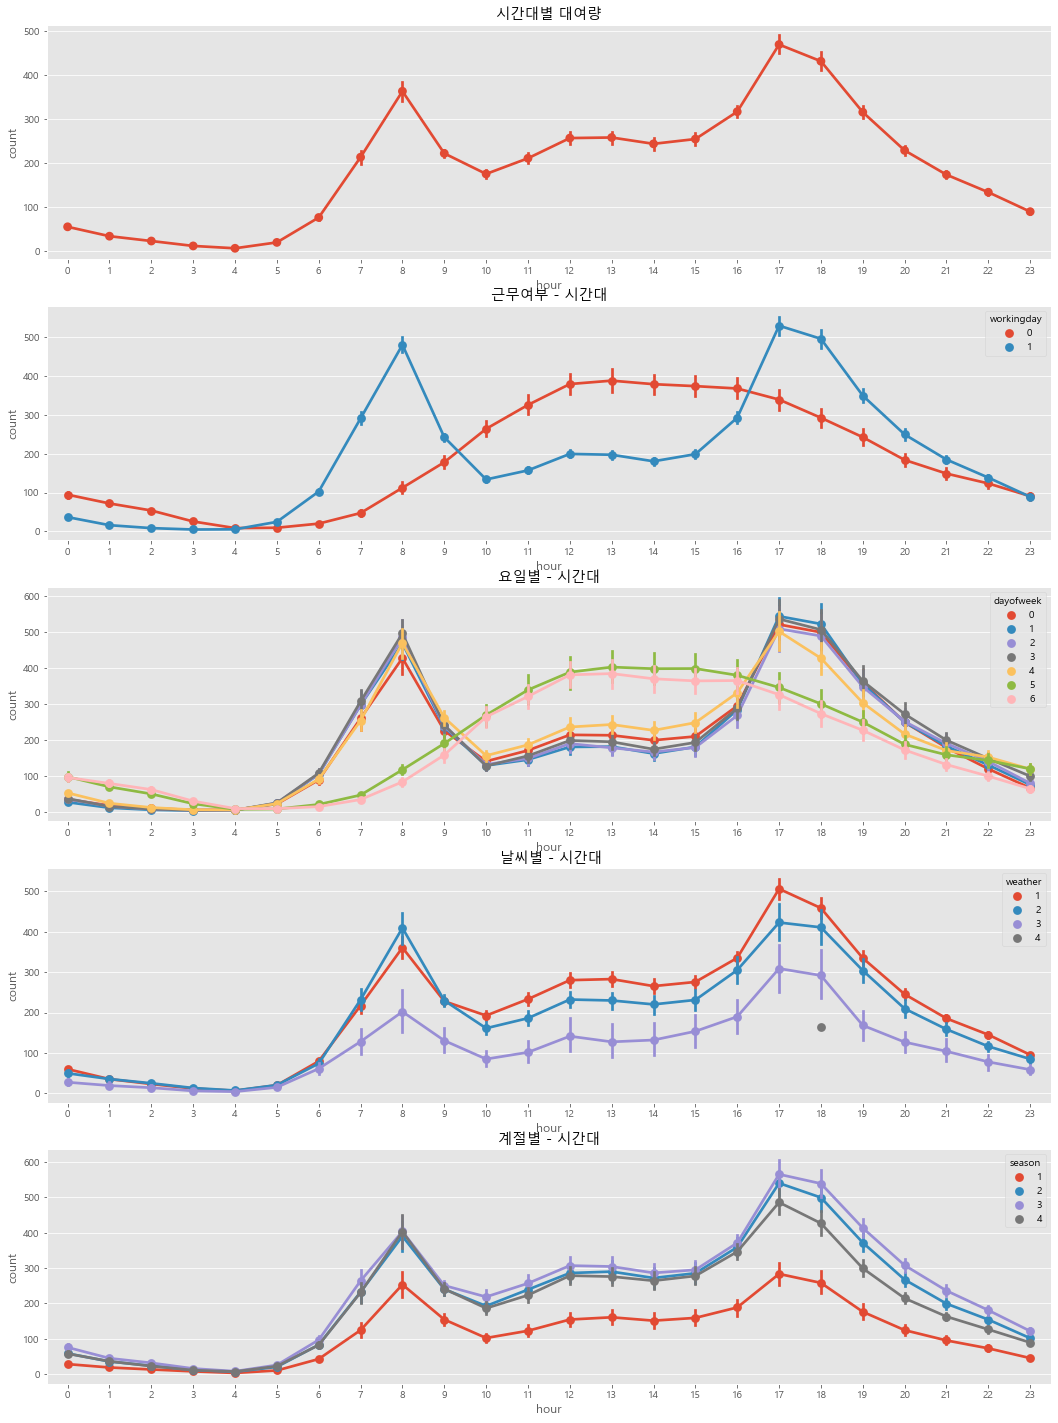

In [54]:
f,ax = plt.subplots(5,figsize = (18,25))

sns.pointplot(data = train, x = 'hour', y = 'count', ax = ax[0])
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', ax = ax[1])
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek', ax = ax[2])
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather', ax = ax[3])
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'season', ax = ax[4])

ax[0].set(title = '시간대별 대여량')
ax[1].set(title = '근무여부 - 시간대')
ax[2].set(title = '요일별 - 시간대')
ax[3].set(title = ' 날씨별 - 시간대')
ax[4].set(title = '계절별 - 시간대')

- 온도, 체감온도, 미등록자, 등록자, 습도, 풍속, 대여량 feature를 가지고 상관관계 시각화

In [55]:
corrMatt = train[['temp','atemp','casual','registered','humidity','windspeed','count']]
corrMatt = corrMatt.corr() # 상관계수 계산 함수
print(corrMatt)

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


heatmap 하면, 사각형 박스를 떠올리게 된다. 
그러나 row 와 columns이 동일해 1의 값을 지니는 대각선을 중심으로 왼쪽아래 삼각형 부분과, 오른쪽 아래 삼격형 부분은 대칭으로 동일한 값을 가진다.
똑같은 값들을 양쪽으로 보여줄 필요가 없기때문에 한쪽 삼각형만 나타내는 것이 더 깔끔하다.
불필요한 부분을 제거해주자

In [61]:
# 삼각형 마스크 생성
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False #위쪽 삼각형 = False

<AxesSubplot:>

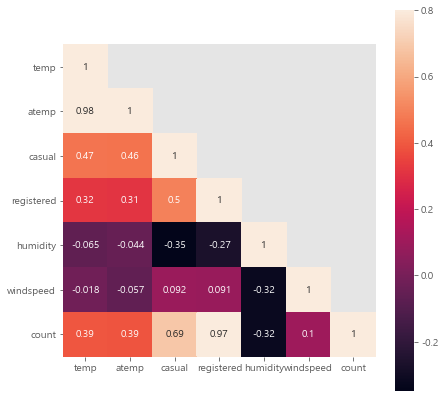

In [69]:
f, ax = plt.subplots(figsize = (7,7))
sns.heatmap(corrMatt, 
            mask=mask, # 표시하지 않을 마스크부분 지정
            vmax=.8, # 컬러바 범위지정
            square=True,
            annot=True)

- 대여량과 각 feature 간의 상관관계를 살펴볼 때, 온도, 습도, 풍속은 거의 상관관계가 없다.
- 대여량과 가장 상관관계가 높은 건 registerd, 하지만 test 데이터에는 이 값이 없다.

<AxesSubplot:xlabel='humidity', ylabel='count'>

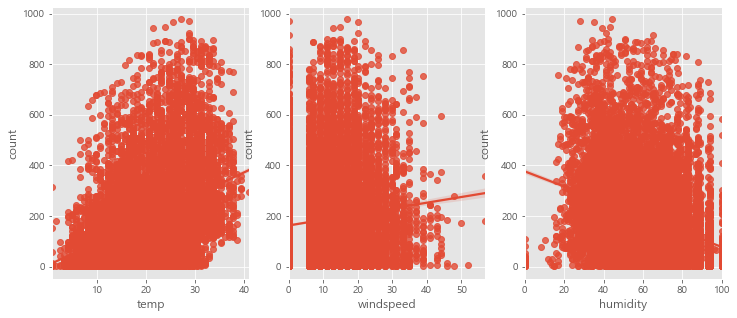

In [88]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3, figsize = (12,5))

sns.regplot(x="temp", y="count", data=train,ax=ax1)
sns.regplot(x="windspeed", y="count", data=train,ax=ax2)
sns.regplot(x="humidity", y="count", data=train,ax=ax3)

- 풍속의 경우 0에 숫자가 몰려 있는 것으로 보인다. 관측되지 않은 수치로 추측

In [91]:
def concat_y_m(datetime):
    return '{}-{}'.format(datetime.year, datetime.month)

train['y_m'] = train['datetime'].apply(concat_y_m)
train['y_m'].head()

0    2011-1
1    2011-1
2    2011-1
3    2011-1
4    2011-1
Name: y_m, dtype: object

[Text(0.5, 1.0, '11-12년 월별 대여량')]

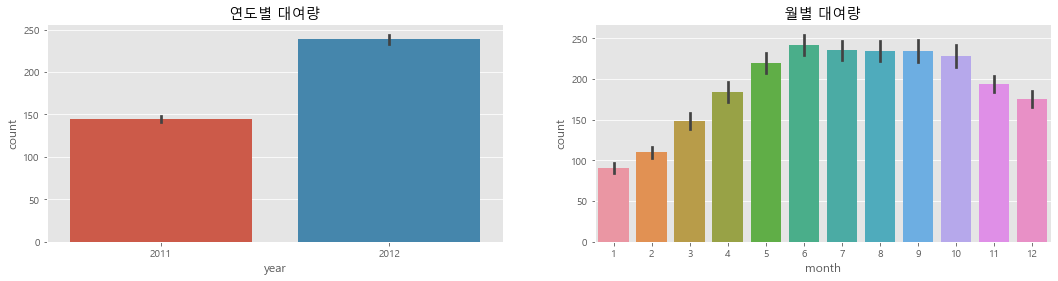

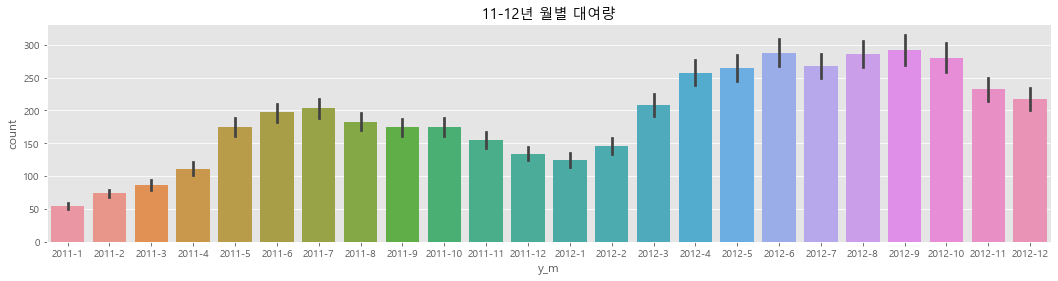

In [94]:
f,(ax1, ax2) = plt.subplots(1, 2, figsize = (18,4))

sns.barplot(data = train, x = 'year', y = 'count', ax= ax1)
ax1.set(title = '연도별 대여량')

sns.barplot(data = train , x = 'month', y = 'count' , ax = ax2)
ax2.set(title = '월별 대여량')

f,ax3 = plt.subplots(1,1,figsize = (18,4))

sns.barplot(data = train , x = 'y_m', y = 'count', ax = ax3)
ax3.set(title = '11-12년 월별 대여량')

- 2011 <  2012
- 겨울 < 여름
- 월별 전체 데이터를 보면 자전거 수요는 전체적으로 증가하는 추세이다.

참고 : https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile